In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/My Drive/Colab Notebooks/CS760/hw4/languageID'
  
# Change the directory
os.chdir(path)
  
i = 0
x = [[]]
y = [[]]
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        with open(file_path, 'r') as f:
          x = np.append(x, f.read())
          y = np.append(y, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Language Identification 
2-3.

In [ ]:
num_letters_e = np.zeros(27)
tot_num_e = 0

In [ ]:
from string import ascii_lowercase
for i in range(60):
  if y[i][0] == 'e':
    if y[i][1] !='1' or y[i] == 'e1.txt':
      for c in x[i]:
        for c1 in ascii_lowercase:
          if c == c1:
            num_letters_e[ord(c)-ord('a')]+=1
            tot_num_e+=1
            break;
        if c == ' ':
          num_letters_e[-1]+=1
          tot_num_e+=1

In [ ]:
theta_e = (num_letters_e+0.5)/(tot_num_e+27*0.5)

In [ ]:
num_letters_j = np.zeros(27)
tot_num_j = 0
for i in range(60):
  if y[i][0] == 'j':
    if y[i][1] !='1' or y[i] == 'j1.txt':
      for c in x[i]:
        for c1 in ascii_lowercase:
          if c == c1:
            num_letters_j[ord(c)-ord('a')]+=1
            tot_num_j+=1
            break;
        if c == ' ':
          num_letters_j[-1]+=1
          tot_num_j+=1
theta_j = (num_letters_j+0.5)/(tot_num_j+27*0.5)

In [ ]:
num_letters_s = np.zeros(27)
tot_num_s = 0
for i in range(60):
  if y[i][0] == 's':
    if y[i][1] !='1' or y[i] == 's1.txt':
      for c in x[i]:
        for c1 in ascii_lowercase:
          if c == c1:
            num_letters_s[ord(c)-ord('a')]+=1
            tot_num_s+=1
            break;
        if c == ' ':
          num_letters_s[-1]+=1
          tot_num_s+=1
theta_s = (num_letters_s+0.5)/(tot_num_s+27*0.5)

In [ ]:
print(theta_e)
map(float, theta_j)
print(theta_s)

[0.06016851 0.01113497 0.02151    0.02197258 0.10536924 0.01893276
 0.01747894 0.04721626 0.05541054 0.00142078 0.00373369 0.02897737
 0.02051875 0.05792169 0.0644639  0.01675202 0.0005617  0.05382455
 0.06618206 0.08012556 0.02666446 0.00928465 0.01549645 0.00115645
 0.01384437 0.00062779 0.17924996]
[1.04560451e-01 8.23286362e-03 3.75258241e-02 3.97459221e-02
 1.13810860e-01 8.60287996e-03 7.18448398e-03 4.53270019e-03
 4.98597021e-02 6.62945947e-03 2.77512257e-04 5.29431717e-02
 2.58086399e-02 5.41765595e-02 7.24923684e-02 2.42669051e-02
 7.67783910e-03 5.92951189e-02 6.57704049e-02 3.56140730e-02
 3.37023219e-02 5.88942678e-03 9.25040856e-05 2.49761031e-03
 7.86284728e-03 2.68261848e-03 1.68264932e-01]


4.

In [ ]:
x_e10 = np.zeros(27)
tot_num_e10 = 0
for i in range(60):
  if y[i] == 'e1.txt':
    for c in x[i]:
      for c1 in ascii_lowercase:
        if c == c1:
          x_e10[ord(c)-ord('a')]+=1
          tot_num_e10+=1
          break;
      if c == ' ':
        x_e10[-1]+=1
        tot_num_e10+=1
bag_e10 = (x_e10+0.5)/(tot_num_e10+27*0.5)

5

In [ ]:
p_e_e10 = pow(theta_e[0], bag_e10[0])
for i in range(1,27):
  p_e_e10*=pow(theta_e[i], bag_e10[i])


In [ ]:
p_e_e10

0.06173162954814634

In [ ]:
p_j_e10 = pow(theta_j[0], bag_e10[0])
for i in range(1,27):
  p_j_e10*=pow(theta_j[i], bag_e10[i])
p_j_e10

0.048239967264103865

In [ ]:
p_s_e10 = pow(theta_s[0], bag_e10[0])
for i in range(1,27):
  p_s_e10*=pow(theta_s[i], bag_e10[i])
p_s_e10

0.05007817663303292

In [ ]:
tot = 0.06173162954814634+0.048239967264103865+0.05007817663303292
print(0.06173162954814634/tot)
print(0.048239967264103865/tot)
print(0.05007817663303292/tot)

0.38570269872484875
0.30140603279639044
0.3128912684787608


7. 

In [ ]:
def prob(a,b):
  res = pow(a[0], b[0])
  for i in range(1, 27):
    res *= pow(a[i], b[i])
  return res

In [ ]:
conf_matrix = [[0,0,0],[0,0,0],[0,0,0]]
for i in range(60):
  if y[i][1] =='1' and y[i] != 'j1.txt' and y[i] != 's1.txt' and y[i] != 'e1.txt' :
    num_vec = np.zeros(27)
    tot_num = 0
    for c in x[i]:
      for c1 in ascii_lowercase:
        if c == c1:
          num_vec[ord(c)-ord('a')]+=1
          tot_num+=1
          break;
      if c == ' ':
        num_vec[-1]+=1
        tot_num+=1
    num_vec = (num_vec+0.5)/(tot_num+27*0.5)
    #print(y[i])
    index_max = np.argmax([prob(theta_e, num_vec), prob(theta_j, num_vec), prob(theta_s, num_vec)])
    #print(index_max)
    if y[i][0] == 'e' and index_max == 0:
      conf_matrix[0][0]+=1
    if y[i][0] == 'e' and index_max == 1:
      conf_matrix[1][0]+=1
    if y[i][0] == 'e' and index_max == 2:
      conf_matrix[2][0]+=1
    if y[i][0] == 'j' and index_max == 0:
      conf_matrix[0][1]+=1
    if y[i][0] == 'j' and index_max == 1:
      conf_matrix[1][1]+=1
    if y[i][0] == 'j' and index_max == 2:
      conf_matrix[2][1]+=1
    if y[i][0] == 's' and index_max == 0:
      conf_matrix[0][2]+=1
    if y[i][0] == 's' and index_max == 1:
      conf_matrix[1][2]+=1
    if y[i][0] == 's' and index_max == 2:
      conf_matrix[2][2]+=1
conf_matrix

[[10, 0, 0], [0, 10, 0], [0, 0, 10]]

Neutral Network

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [154]:
import math
def sigmoid(x):
  # http://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
  
  x = np.clip(x, -500, 500) 
  
  return np.where(
    x >= 0,
    1 / (1 + np.exp(-x)),
    np.exp(x) / (1 + np.exp(x))
  )

In [59]:
from numpy import exp
def softmax(vector):
 e = exp(vector)
 return e / e.sum()
def one_hot(x):
  res = np.zeros(10)
  res[x] = 1
  return res

In [62]:
def entropy_loss(y, yhat):
  return -np.sum(y * np.log(yhat))

In [167]:
import random
w1 = np.random.rand(32,28*28)
w2 = np.random.rand(32, 32)
w3 = np.random.rand(10, 32)

In [168]:
weights = [w1, w2, w3]

In [169]:
def feed_forward_sample(sample, label):
  temp = sample.flatten()
  for index, w in enumerate(weights):
    z = np.matmul(w, temp)
    if index < len(weights) - 1:
      temp = sigmoid(z)
    else:
      temp = softmax(z)
  onehot_y = one_hot(label)
  loss = entropy_loss(onehot_y, temp)

  index = np.argmax(temp)
  temp[index] = 1
  for i in range(10):
    if i!=index:
      temp[i] = 0
  return loss, temp

In [170]:
def feed_forward_all(x, y):
  datasize = x.shape[0]
  losses = np.empty(datasize)
  one_hot_guesses = np.empty((datasize, 10))
  for i in range(datasize):
    losses[i], one_hot_guesses[i] = feed_forward_sample(x[i], y[i])
  y_one_hot = np.zeros((datasize, 10))
  y_one_hot[np.arange(datasize), y] = 1

  correct_guesses = np.sum(y_one_hot * one_hot_guesses)
  correct_guess_percent = format((correct_guesses / datasize) * 100, ".2f")
  print("Accuracy: ", correct_guesses, "/", datasize, "(", correct_guess_percent, "%)")
  

In [171]:
feed_forward_all(X_train, Y_train)

Accuracy:  5923.0 / 60000 ( 9.87 %)


In [172]:
def dsigmoid(x): # Derivative of sigmoid
  return sigmoid(x) * (1 - sigmoid(x))

In [173]:
def train_sample(sample, y, step):
  a = sample.flatten()
  activations=[]
  for i, w in enumerate(weights): 
    z = np.matmul(w, a) 
    if (i <= 1):
      a = sigmoid(z)
    else:  
      a = softmax(z) 
    activations.append(a)

  one_hot_y = one_hot(y)

  one_hot_guess = np.zeros(10)
  index = np.argmax(a)
  one_hot_guess[index] = 1

  correct_guess = (np.sum(one_hot_y * one_hot_guess) == 1)

  weight_gradients = [None] * 3
  bias_gradients = [None] * 3
  activation_gradients = [None] * 2
  
  for i in range(2, -1, -1): 
    if i == 2:
      y = one_hot_y[:, np.newaxis]
      a = activations[i][:, np.newaxis]
      a_prev = np.array(activations[i-1])[:, np.newaxis]

      weight_gradients[i] = np.dot(np.array(a - y), a_prev.T)

    else:
      w_next = weights[i+1]
      a_next = activations[i + 1][:, np.newaxis]
      y = one_hot_y[:, np.newaxis]
      a = np.array(activations[i])[:, np.newaxis]
      if i > 0:
        a_prev = np.array(activations[i-1])[:, np.newaxis]
      else:
        a_prev = sample.flatten()[:, np.newaxis]

      if i == 1:
        dCda = np.matmul(w_next.T, (a_next - y))
        activation_gradients[i] = dCda
      else:
        dCda_next = activation_gradients[i+1]
        Cda = np.matmul(w_next.T, (dsigmoid(a_next) * dCda_next))
        activation_gradients[i] = dCda

      x = dsigmoid(a) * dCda
      weight_gradients[i] = np.dot(np.array(x), np.array(a_prev).T)

    weights[i] -= weight_gradients[i] * step




In [174]:
train_sample(X_train[0], Y_train[0], 0.005)

In [178]:
import random

for i in range(20):
  for j in range(256):
    num = random.sample(range(60000), 1)
    train_sample(X_train[num], Y_train[num], 0.005)

In [179]:
feed_forward_all(X_train, Y_train)

Accuracy:  6516.0 / 60000 ( 10.86 %)


In [180]:
for i in range(200):
  for j in range(256):
    num = random.sample(range(60000), 1)
    train_sample(X_train[num], Y_train[num], 0.005)
  if i%20 == 0:
    feed_forward_all(X_train, Y_train)

Accuracy:  6211.0 / 60000 ( 10.35 %)
Accuracy:  7406.0 / 60000 ( 12.34 %)
Accuracy:  24949.0 / 60000 ( 41.58 %)
Accuracy:  29428.0 / 60000 ( 49.05 %)
Accuracy:  37906.0 / 60000 ( 63.18 %)
Accuracy:  40449.0 / 60000 ( 67.42 %)
Accuracy:  43233.0 / 60000 ( 72.06 %)
Accuracy:  44431.0 / 60000 ( 74.05 %)
Accuracy:  45192.0 / 60000 ( 75.32 %)
Accuracy:  45535.0 / 60000 ( 75.89 %)


In [181]:
for i in range(200):
  for j in range(256):
    num = random.sample(range(60000), 1)
    train_sample(X_train[num], Y_train[num], 0.005)
  if i%20 == 0:
    feed_forward_all(X_train, Y_train)

Accuracy:  45915.0 / 60000 ( 76.53 %)
Accuracy:  46734.0 / 60000 ( 77.89 %)
Accuracy:  47000.0 / 60000 ( 78.33 %)
Accuracy:  47278.0 / 60000 ( 78.80 %)
Accuracy:  47717.0 / 60000 ( 79.53 %)
Accuracy:  48009.0 / 60000 ( 80.02 %)
Accuracy:  48064.0 / 60000 ( 80.11 %)
Accuracy:  48283.0 / 60000 ( 80.47 %)
Accuracy:  48380.0 / 60000 ( 80.63 %)
Accuracy:  48801.0 / 60000 ( 81.34 %)


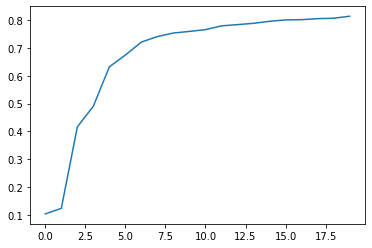

In [191]:
from matplotlib import pyplot as plt
plt.plot([0.1035, 0.1234, 0.4158,  0.4905,0.6318,0.6742,0.7206, 0.7405, 0.7532, 0.7589, 0.7653, 0.7789, 0.7833, 0.7880, 0.7953, 0.8002, 0.8011, 0.8047, 0.8063, 0.8134])

In [190]:
feed_forward_all(X_test, Y_test)

Accuracy:  8125.0 / 10000 ( 81.25 %)


Use Tensorflow

In [196]:
import tensorflow as tf
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [197]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [223]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    batch_size=256,
    epochs=100,
    validation_data=ds_test,
)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3305 - sparse_categorical_accuracy: 0.1701 - val_loss: 2.2863 - val_sparse_categorical_accuracy: 0.2279
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.2789 - sparse_categorical_accuracy: 0.2109 - val_loss: 2.2707 - val_sparse_categorical_accuracy: 0.1535
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2645 - sparse_categorical_accuracy: 0.1928 - val_loss: 2.2559 - val_sparse_categorical_accuracy: 0.2541
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2494 - sparse_categorical_accuracy: 0.2848 - val_loss: 2.2400 - val_sparse_categorical_accuracy: 0.3115
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2329 - sparse_categorical_accuracy: 0.3497 - val_loss: 2.2222 - val_sparse_categorical_accuracy: 0.3624
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2143 - sparse_cate

In [224]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3683 - sparse_categorical_accuracy: 0.9005


[0.3682970404624939, 0.9004999995231628]

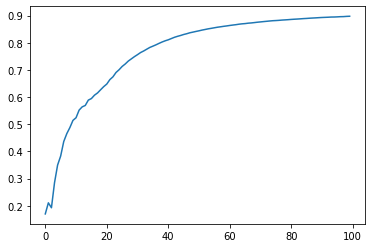

In [227]:
plt.plot(range(100),history.history['sparse_categorical_accuracy'])

###Different initial weights
a) zeros

In [242]:
initializer = tf.keras.initializers.Zeros()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='sigmoid', kernel_initializer=initializer),
  tf.keras.layers.Dense(32, activation='sigmoid', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    batch_size=256,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.3016 - sparse_categorical_accuracy: 0.1123 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3013 - sparse_categorica

In [243]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 1ms/step - loss: 2.3010 - sparse_categorical_accuracy: 0.1135


[2.3010120391845703, 0.11349999904632568]

Text(0.5, 1.0, 'zeros initilizer')

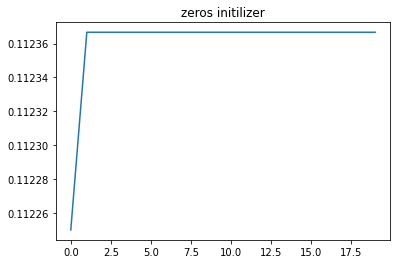

In [245]:
plt.plot(range(20),history.history['sparse_categorical_accuracy'])
plt.title("zeros initilizer")

In [237]:
initializer = tf.keras.initializers.RandomUniform(minval=-1, maxval=1.)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='sigmoid', kernel_initializer=initializer),
  tf.keras.layers.Dense(32, activation='sigmoid', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    batch_size=256,
    epochs=100,
    validation_data=ds_test,
)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.5668 - sparse_categorical_accuracy: 0.1624 - val_loss: 2.1342 - val_sparse_categorical_accuracy: 0.2198
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.0812 - sparse_categorical_accuracy: 0.2583 - val_loss: 2.0123 - val_sparse_categorical_accuracy: 0.3137
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 1.9718 - sparse_categorical_accuracy: 0.3359 - val_loss: 1.9096 - val_sparse_categorical_accuracy: 0.3756
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 1.8763 - sparse_categorical_accuracy: 0.3907 - val_loss: 1.8191 - val_sparse_categorical_accuracy: 0.4220
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.7913 - sparse_categorical_accuracy: 0.4305 - val_loss: 1.7382 - val_sparse_categorical_accuracy: 0.4569
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 1.7149 - sparse_cate

In [241]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.4766 - sparse_categorical_accuracy: 0.8595


[0.47660279273986816, 0.859499990940094]

Text(0.5, 1.0, 'uniform initilizer')

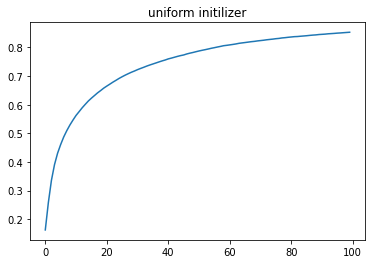

In [240]:
plt.plot(range(100), history.history['sparse_categorical_accuracy'])
plt.title("uniform initilizer")